https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=es

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Construimos el modelo

# Las entradas van a tener 784 dimensiones en forma de vector (28x28)
inputs = keras.Input(shape=(784,), name="digits")
# Primera capa de la red, con 64 neuronas y usando ReLu
x1 = layers.Dense(64, activation="relu")(inputs)
# Segunda capa de la red, con 64 neuronas y usando ReLu
x2 = layers.Dense(32, activation="relu")(x1)
# La salida de la red con 10 neuronas porque estamos usando un algoritmo de clasificación de 10
# Softmax 
outputs = layers.Dense(10, activation="softmax", name="predictions")(x2)

model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
# Ejemplo de otra creación de capas (NO EJECUTAR)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation="softmax")
  ])

In [6]:
# Cogemos las imágenes de los dígitos y cogemos el conjunto de train, val y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
# Normalizamos la imagen dividiéndola por 255 y transformándola a imagen 28x28
to_show = (x_train[1]/255).reshape(28,28)
to_show

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

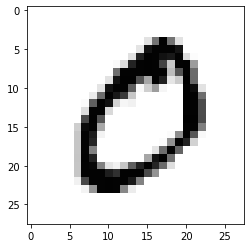

In [24]:
import matplotlib.pyplot as plt

plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [25]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [26]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [27]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/15
782/782 [==============================] - 1s 866us/step - loss: 0.3557 - sparse_categorical_accuracy: 0.9011 - val_loss: 0.2018 - val_sparse_categorical_accuracy: 0.9431
Epoch 2/15
782/782 [==============================] - 1s 716us/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.1581 - val_sparse_categorical_accuracy: 0.9520
Epoch 3/15
782/782 [==============================] - 1s 710us/step - loss: 0.1263 - sparse_categorical_accuracy: 0.9631 - val_loss: 0.1223 - val_sparse_categorical_accuracy: 0.9635
Epoch 4/15
782/782 [==============================] - 1s 759us/step - loss: 0.1010 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.1208 - val_sparse_categorical_accuracy: 0.9658
Epoch 5/15
782/782 [==============================] - 1s 770us/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.1119 - val_sparse_categorical_accuracy: 0.9668
Epoch 6/15
782/782 [==============================] - 1s 763us/

In [29]:
# Podemos ver el histórico que ha ocurrido cogiendo el mejor de cada epoch
history.history

{'loss': [0.3557060956954956,
  0.16941088438034058,
  0.1263016164302826,
  0.10096071660518646,
  0.08484864979982376,
  0.07349428534507751,
  0.06364475935697556,
  0.05637649819254875,
  0.04974992200732231,
  0.04412125423550606,
  0.039828162640333176,
  0.035149943083524704,
  0.032384153455495834,
  0.02819649502635002,
  0.02535531483590603],
 'sparse_categorical_accuracy': [0.9010999798774719,
  0.9495800137519836,
  0.9631400108337402,
  0.9696400165557861,
  0.9749199748039246,
  0.9784200191497803,
  0.9810199737548828,
  0.9827600121498108,
  0.9856200218200684,
  0.9867799878120422,
  0.9882000088691711,
  0.9895600080490112,
  0.9904199838638306,
  0.991599977016449,
  0.9923800230026245],
 'val_loss': [0.20180031657218933,
  0.15812905132770538,
  0.12231741845607758,
  0.12078747898340225,
  0.111920565366745,
  0.1064257100224495,
  0.09438962489366531,
  0.1042674332857132,
  0.09957998991012573,
  0.09872927516698837,
  0.10459394752979279,
  0.11090189218521118,


In [30]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 571us/step - loss: 0.1100 - sparse_categorical_accuracy: 0.9728
test loss, test acc: [0.10998820513486862, 0.9728000164031982]


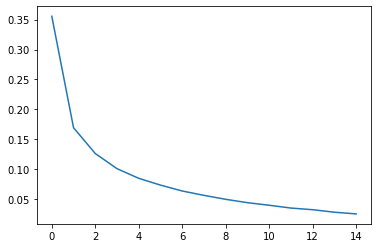

In [35]:
plt.plot(history.history["loss"])

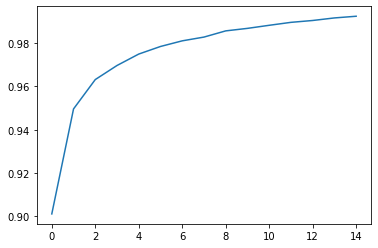

In [36]:
plt.plot(history.history['sparse_categorical_accuracy'])

In [37]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:1])
print("predictions shape:", predictions.shape)
predictions

Generate predictions for 3 samples
predictions shape: (1, 10)


array([[7.9633279e-11, 3.2341458e-13, 5.7727878e-08, 3.1013553e-06,
        1.7421859e-18, 4.2084683e-10, 2.7654753e-15, 9.9999678e-01,
        5.5122523e-10, 5.4728467e-08]], dtype=float32)

In [58]:
predictions.max()

0.9999999

In [59]:
predictions.argmax()

7

In [60]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
for i,image_predicted in enumerate(predictions):
    print("Image",i,":", image_predicted.argmax())
    #plt.imshow(x_test[2:3].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))

Generate predictions for 3 samples
predictions shape: (3, 10)
Image 0 : 7
Image 1 : 2
Image 2 : 1


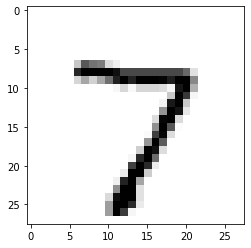

In [38]:
to_show = (x_test[0]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

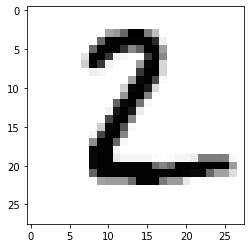

In [39]:
to_show = (x_test[1]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

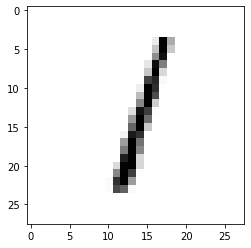

In [40]:
to_show = (x_test[2]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))